In [72]:
from PIL import Image
import numpy as np
!pip install --user pytesseract
!pip install --user opencv-python
import pytesseract 

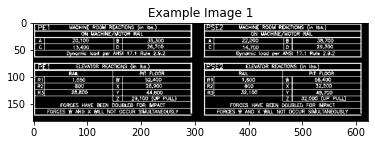

In [73]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image1=cv2.imread('pictures/test_text.png')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
thresh1,img_bin1 = cv2.threshold(image1,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin1 = 255-img_bin1
plotting = plt.imshow(img_bin1,cmap='gray')
plt.title("Example Image 1")
plt.show()


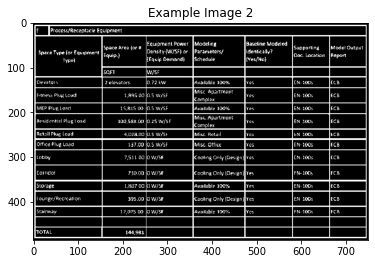

In [74]:
image2=cv2.imread('pictures/test_text2.png')
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
thresh2,img_bin2 = cv2.threshold(image2,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin2 = 255-img_bin2
plotting = plt.imshow(img_bin2,cmap='gray')
plt.title("Example Image 2")
plt.show()

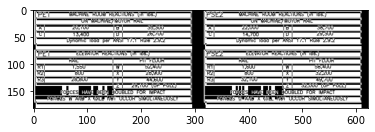

In [75]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
vertical_kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(image1).shape[1]//150))
eroded_image1 = cv2.erode(image1, vertical_kernel1, iterations=5)
vertical_lines1 = cv2.dilate(eroded_image1, vertical_kernel1, iterations=5)
hor_kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(image1).shape[1]//150, 1))
image_1 = cv2.erode(img_bin1, hor_kernel1, iterations=5)
horizontal_lines1 = cv2.dilate(image_1, hor_kernel1, iterations=5)
vertical_horizontal_lines1 = cv2.addWeighted(vertical_lines1, 0.5, horizontal_lines1, 0.5, 0.0)
vertical_horizontal_lines1 = cv2.erode(~vertical_horizontal_lines1, kernel, iterations=3)
thresh1, vertical_horizontal_lines1 = cv2.threshold(vertical_horizontal_lines1,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image1 = cv2.bitwise_not(cv2.bitwise_xor(image1,vertical_horizontal_lines1))
plotting = plt.imshow(b_image1,cmap='gray')
plt.show()

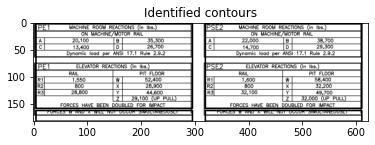

In [76]:
contours1, hierarchy1 = cv2.findContours(vertical_horizontal_lines1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes1 = [cv2.boundingRect(c) for c in contours1]
(contours1, boundingBoxes1) = zip(*sorted(zip(contours1, boundingBoxes1),
key=lambda x:x[1][1]))
boxes1 = []
for contour in contours1:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(image1,(x,y),(x+w,y+h),(0,255,0),2)
        boxes1.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [77]:
rows1=[]
columns1=[]
heights1= [boundingBoxes1[i][3] for i in range(len(boundingBoxes1))]
mean1= np.mean(heights1)
print(mean1)
columns1.append(boxes1[0])
previous1=boxes1[0]
for i in range(1,len(boxes1)):
    if(boxes1[i][1]<=previous1[1]+mean1/2):
        columns1.append(boxes1[i])
        previous=boxes1[i]
        if(i==len(boxes1)-1):
            rows1.append(columns1)
    else:
        rows1.append(columns1)
        columns1=[]
        previous1 = boxes1[i]
        columns1.append(boxes1[i])
print("Rows")
for row in rows1:
    print(row)
total_cells1=0
for i in range(len(rows1)):
    if len(rows1[i]) > total_cells1:
        total_cells1 = len(rows1[i])
    print(total_cells1)
center1 = [int(rows1[i][j][0]+rows1[i][j][2]/2) for j in range(len(rows1[i])) if rows1[0]]
print(center1)
center1=np.array(center1)
center1.sort()
print(center1)

89.0
Rows
[[320, 0, 291, 158], [5, 0, 291, 158]]
[[320, 162, 291, 20], [5, 162, 291, 20]]
2
2
[465, 150]
[150 465]


In [78]:
boxes_list1 = []
for i in range(len(rows1)):
    l=[]
    for k in range(total_cells1):
        l.append([])
    for j in range(len(rows1[i])):
        diff = abs(center1-(rows1[i][j][0]+rows1[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows1[i][j])
    boxes_list1.append(l)
for box in boxes_list1:
    print(box)

[[[5, 0, 291, 158]], [[320, 0, 291, 158]]]
[[[5, 162, 291, 20]], [[320, 162, 291, 20]]]


In [81]:
dataframe_final1=[]
for i in range(len(boxes_list1)):
    for j in range(len(boxes_list1[i])):
     s=''
     if(len(boxes_list1[i][j])==0):
       dataframe_final1.append(' ')
     else:
        for k in range(len(boxes_list1[i][j])):
            y,x,w,h = boxes_list1[i][j][k][0],boxes_list1[i][j][k][1], boxes_list1[i][j][k][2],boxes_list1[i][j][k][3]
            roi = image1[x:x+h, y:y+w]
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
            border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
            resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
            dilation = cv2.dilate(resizing, kernel,iterations=1)
            erosion = cv2.erode(dilation, kernel,iterations=2)
            out = pytesseract.image_to_string(erosion)
            if(len(out)==0):
                out = pytesseract.image_to_string(erosion)
            s = s +" "+ out
        dataframe_final1.append(s)
print(dataframe_final1)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.